# Imbalance Data

In [1]:
import pandas as pd
import numpy  as np
import seaborn as SB
import matplotlib.pyplot as PLT
import scipy.stats as STATS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn import metrics
import random
from sklearn.svm import SVC
from catboost import CatBoostClassifier


/opt/conda/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
n = 5000
skip = sorted(random.sample(range(1,319795),319795-n))
DF = pd.read_csv('../../datasets/heart_2020_cleaned.csv',skiprows=skip).reset_index().rename(columns={'index':'id'})

In [3]:
CatCols = [
    'Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic',
    'PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer'
]
NumCols = [
    'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'
]

X = DF[DF.columns.difference(['id','HeartDisease'])]
Y = DF['HeartDisease']

In [4]:
X.head()

,AgeCategory,AlcoholDrinking,Asthma,BMI,Diabetic,DiffWalking,GenHealth,KidneyDisease,MentalHealth,PhysicalActivity,PhysicalHealth,Race,Sex,SkinCancer,SleepTime,Smoking,Stroke
0,65-69,No,No,40.69,No,Yes,Good,No,0.0,Yes,0.0,White,Male,No,10.0,No,No
1,75-79,No,No,29.86,Yes,Yes,Fair,Yes,0.0,No,0.0,Black,Female,No,5.0,Yes,No
2,60-64,No,No,31.66,No,No,Very good,No,0.0,Yes,5.0,White,Male,No,5.0,Yes,No
3,60-64,No,No,36.58,Yes,No,Good,No,0.0,No,0.0,White,Female,Yes,5.0,No,No
4,65-69,No,No,28.41,No,Yes,Fair,Yes,3.0,Yes,10.0,White,Male,No,7.0,Yes,No


# <font color="Brown">BMI :</font>

In [5]:
X['BMI'].describe() 

count    5000.000000
mean       28.328660
std         6.339718
min        12.830000
25%        24.020000
50%        27.370000
75%        31.570000
max        82.420000
Name: BMI, dtype: float64

In [6]:
# normal range 10 ~ 50

In [7]:
X[X['BMI']<=50].groupby(['Sex'])['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,2556.0,27.906123,6.436855,12.84,23.1250,26.695,31.4625,49.78
Male,2416.0,28.431792,5.308637,12.83,24.6875,27.690,31.3800,48.79


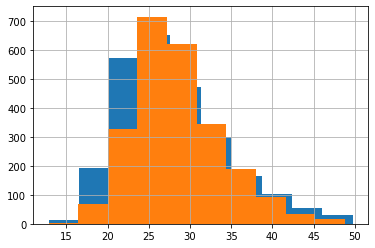

In [8]:
BMI_Normal_Range = X[X['BMI']<=50]
BMI_Normal_Range.groupby(['Sex'])['BMI'].hist()
PLT.show()

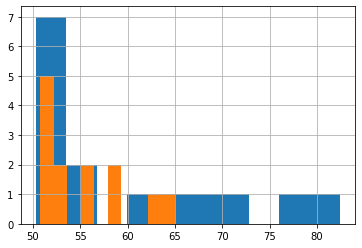

In [9]:
BMI_Out_Of_Range = X[X['BMI']>50]
BMI_Out_Of_Range.groupby(['Sex'])['BMI'].hist()
PLT.show()

In [10]:
# Drop rows with out of rage BMI
# X = X.drop(BMI_Out_Of_Range.index,errors='ignore')

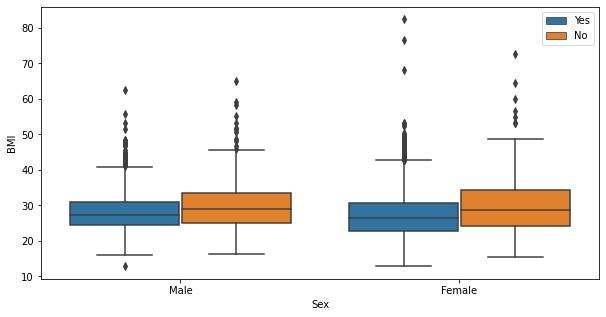

In [11]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['BMI'], hue=X['PhysicalActivity']).legend(loc='upper right')

# <font color="Brown">AlcoholDrinking :</font>

In [12]:
X['AlcoholDrinking'].describe()

count     5000
unique       2
top         No
freq      4666
Name: AlcoholDrinking, dtype: object

In [13]:
X['AlcoholDrinking'].value_counts()

No     4666
Yes     334
Name: AlcoholDrinking, dtype: int64

# <font color="Brown">AgeCategory :</font>

In [14]:
X['AgeCategory'].describe()

count      5000
unique       13
top       65-69
freq        563
Name: AgeCategory, dtype: object

In [15]:
X['AgeCategory'].value_counts()

65-69          563
70-74          506
60-64          485
55-59          469
80 or older    420
50-54          374
75-79          341
45-49          339
40-44          333
18-24          313
35-39          311
30-34          282
25-29          264
Name: AgeCategory, dtype: int64

In [16]:
_1 = X[X['AgeCategory']!='80 or older']['AgeCategory'].str.split('-').apply(
    lambda x : (int(x[0])+int(x[1]))/2
)
_2 = X[X['AgeCategory']=='80 or older']['AgeCategory'].str.split(' or ').apply(
    lambda x : 80
)
X.loc[_1.index,'AgeCategory'] = _1
X.loc[_2.index,'AgeCategory'] = _2
del _1,_2

In [17]:
X['AgeCategory'] = X['AgeCategory'].astype(np.int64) 

/tmp/ipykernel_2676/1643673884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AgeCategory'] = X['AgeCategory'].astype(np.int64)


In [18]:
X['AgeCategory'].describe()

count    5000.000000
mean       54.882400
std        17.781018
min        21.000000
25%        42.000000
50%        57.000000
75%        72.000000
max        80.000000
Name: AgeCategory, dtype: float64

<AxesSubplot:>

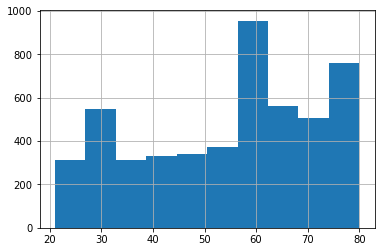

In [19]:
X['AgeCategory'].hist()

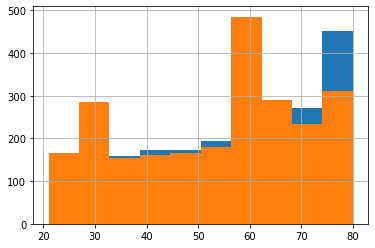

In [20]:
X.groupby(['Sex'])['AgeCategory'].hist()
PLT.show()

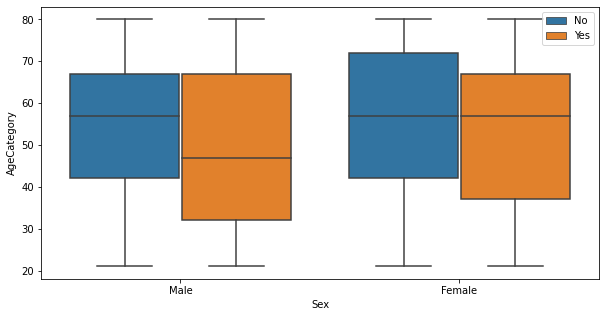

In [21]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['Asthma']).legend(loc='upper right')

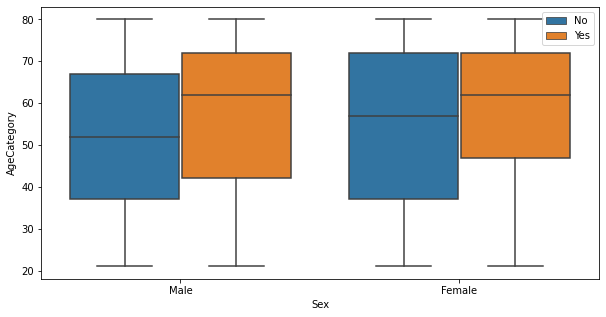

In [22]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['Smoking']).legend(loc='upper right')

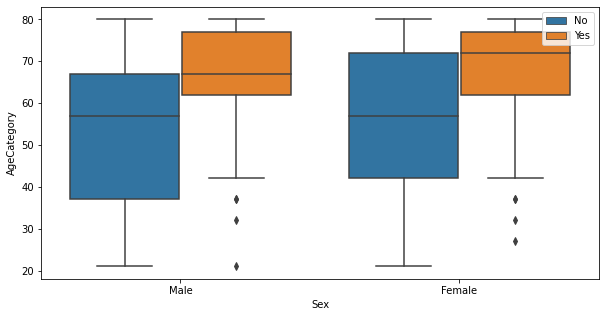

In [23]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['Stroke']).legend(loc='upper right')

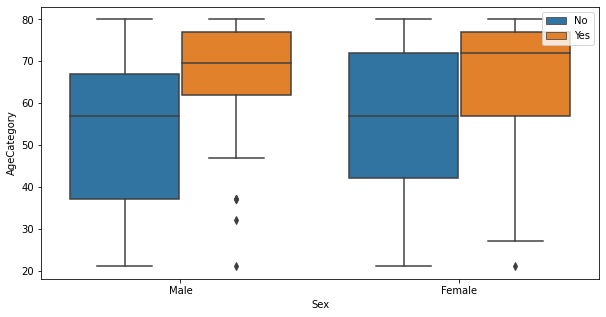

In [24]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['KidneyDisease']).legend(loc='upper right')

In [25]:
CatCols = [
    'Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','Race','Diabetic',
    'PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer'
]
NumCols = [
    'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime','AgeCategory'
]

# <font color="Brown">Asthma :</font>

In [26]:
DF['Asthma'].value_counts()

No     4363
Yes     637
Name: Asthma, dtype: int64

In [27]:
DF['Asthma'].describe()

count     5000
unique       2
top         No
freq      4363
Name: Asthma, dtype: object

In [28]:
DF['Asthma'].isnull().sum()

0

# <font color="Brown">Diabetic :</font>

In [29]:
X['Diabetic'].value_counts()

No                         4238
Yes                         624
No, borderline diabetes      98
Yes (during pregnancy)       40
Name: Diabetic, dtype: int64

In [30]:
X['Diabetic'].isnull().sum()

0

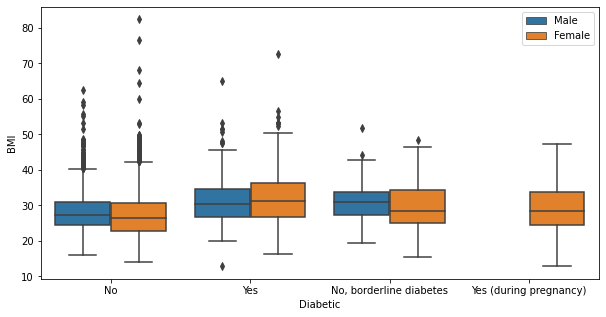

In [31]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Diabetic'],y=X['BMI'], hue=X['Sex']).legend(loc='upper right')

# <font color="Brown">DiffWalking :</font>

In [32]:
X['DiffWalking'].value_counts()

No     4300
Yes     700
Name: DiffWalking, dtype: int64

In [33]:
X['DiffWalking'].isnull().sum()

0

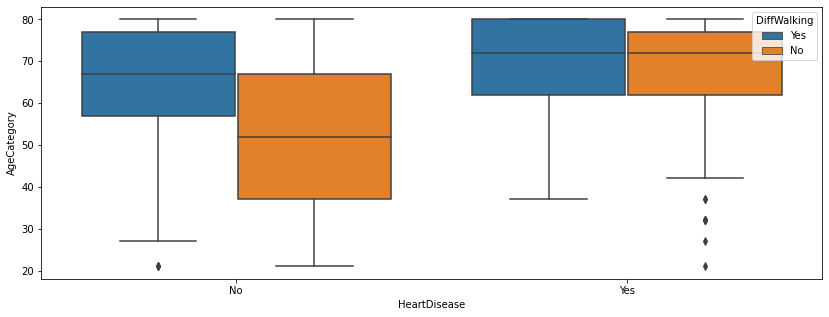

In [34]:
PLT.figure(figsize=(14,5))
SB.boxplot(x=Y,y=X['AgeCategory'], hue=X['DiffWalking']).legend(loc='upper right',title='DiffWalking')

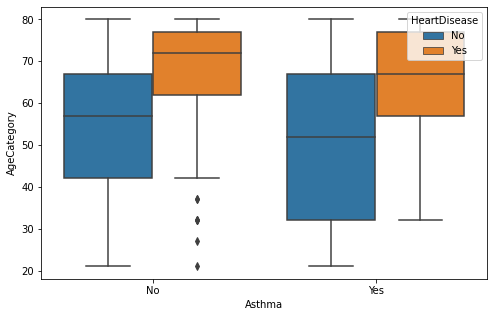

In [35]:
PLT.figure(figsize=(8,5))
SB.boxplot(x=X['Asthma'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">GenHealth :</font>

In [36]:
X['GenHealth'].describe()

count          5000
unique            5
top       Very good
freq           1803
Name: GenHealth, dtype: object

In [37]:
X['GenHealth'].isnull().sum()

0

In [38]:
X['GenHealth'].value_counts()

Very good    1803
Good         1462
Excellent    1012
Fair          541
Poor          182
Name: GenHealth, dtype: int64

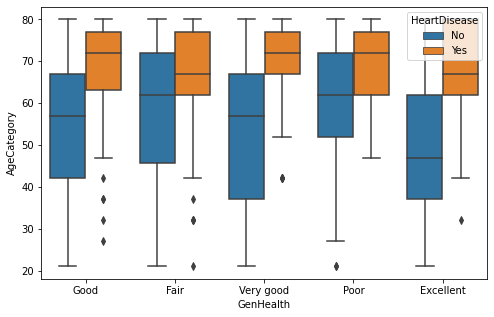

In [39]:
PLT.figure(figsize=(8,5))
SB.boxplot(x=X['GenHealth'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">KidneyDisease :</font>

In [40]:
X['KidneyDisease'].describe()

count     5000
unique       2
top         No
freq      4792
Name: KidneyDisease, dtype: object

In [41]:
X['KidneyDisease'].isnull().sum()

0

In [42]:
X['KidneyDisease'].value_counts()

No     4792
Yes     208
Name: KidneyDisease, dtype: int64

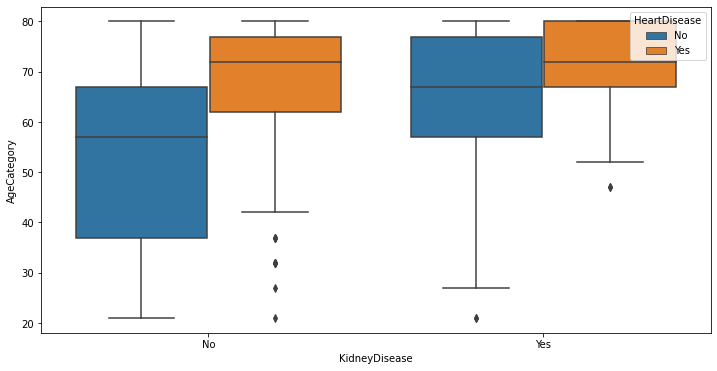

In [43]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['KidneyDisease'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">MentalHealth :</font>

In [44]:
X['MentalHealth'].describe()

count    5000.000000
mean        4.019600
std         8.050278
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max        30.000000
Name: MentalHealth, dtype: float64

In [45]:
X['MentalHealth'].isna().sum()

0

In [46]:
X['MentalHealth'].value_counts().sort_index()

0.0     3186
1.0      122
2.0      245
3.0      187
4.0       88
5.0      224
6.0       22
7.0       88
8.0       17
9.0        1
10.0     176
11.0       2
12.0      14
13.0       3
14.0      37
15.0     168
18.0       1
20.0      74
21.0       5
22.0       3
23.0       1
25.0      41
27.0       6
28.0       4
29.0       8
30.0     277
Name: MentalHealth, dtype: int64

<AxesSubplot:>

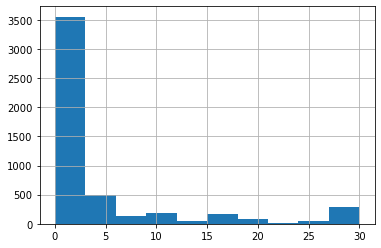

In [47]:
X['MentalHealth'].hist()

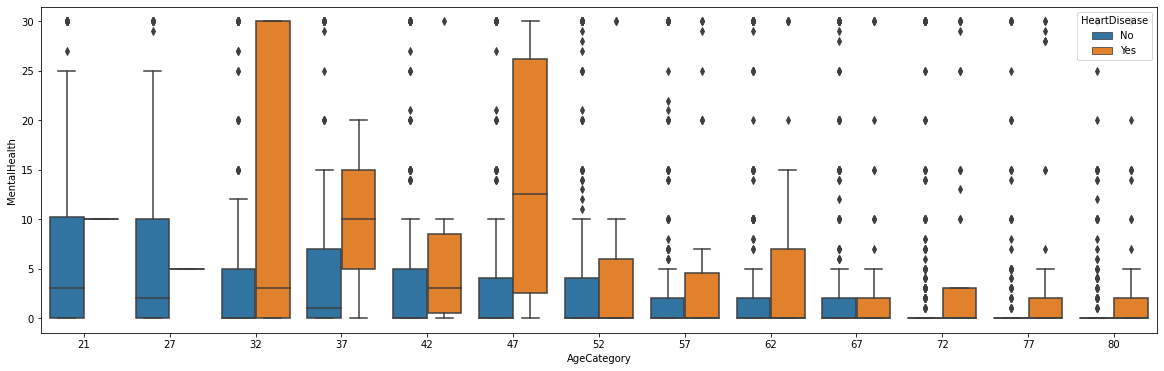

In [48]:
PLT.figure(figsize=(20,6))
SB.boxplot(y=X['MentalHealth'],x=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">PhysicalActivity :</font>

In [49]:
X['PhysicalActivity'].describe()

count     5000
unique       2
top        Yes
freq      3887
Name: PhysicalActivity, dtype: object

In [50]:
X['PhysicalActivity'].isna().sum()

0

In [51]:
X['PhysicalActivity'].value_counts().sort_index()

No     1113
Yes    3887
Name: PhysicalActivity, dtype: int64

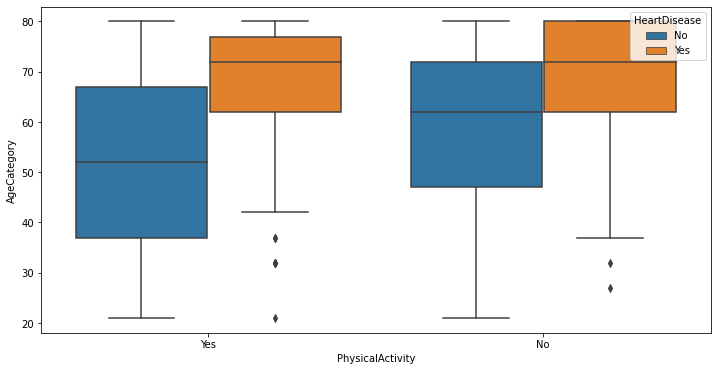

In [52]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['PhysicalActivity'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">PhysicalHealth :</font>

In [53]:
X['PhysicalHealth'].describe()

count    5000.000000
mean        3.493000
std         8.092333
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        30.000000
Name: PhysicalHealth, dtype: float64

In [54]:
X['PhysicalHealth'].isna().sum()

0

In [55]:
X['PhysicalHealth'].value_counts().sort_index()

0.0     3534
1.0      143
2.0      220
3.0      153
4.0       57
5.0      119
6.0       18
7.0       87
8.0       13
9.0        4
10.0      94
11.0       1
12.0      15
13.0       2
14.0      45
15.0      69
16.0       1
18.0       7
19.0       1
20.0      46
21.0      11
22.0       4
25.0      26
26.0       1
27.0       3
28.0       5
29.0       6
30.0     315
Name: PhysicalHealth, dtype: int64

<AxesSubplot:>

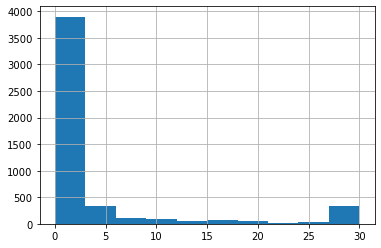

In [56]:
X['PhysicalHealth'].hist()

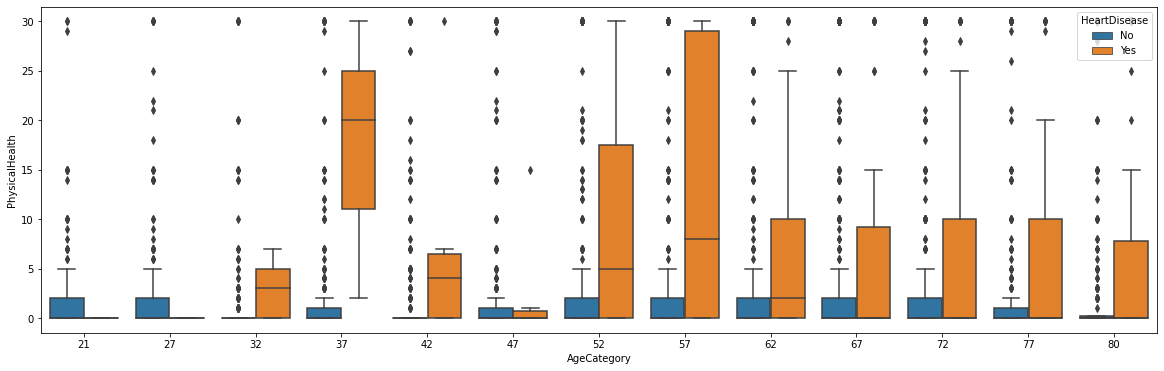

In [57]:
PLT.figure(figsize=(20,6))
SB.boxplot(y=X['PhysicalHealth'],x=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">Race :</font>

In [58]:
X['Race'].describe()

count      5000
unique        6
top       White
freq       3837
Name: Race, dtype: object

In [59]:
X['Race'].isnull().sum()

0

In [60]:
X['Race'].value_counts()

White                             3837
Hispanic                           415
Black                              355
Other                              173
Asian                              128
American Indian/Alaskan Native      92
Name: Race, dtype: int64

# <font color="Brown">Race :</font>

In [61]:
X['Sex'].describe()

count       5000
unique         2
top       Female
freq        2571
Name: Sex, dtype: object

In [62]:
X['Sex'].isnull().sum()

0

In [63]:
X['Sex'].value_counts()

Female    2571
Male      2429
Name: Sex, dtype: int64

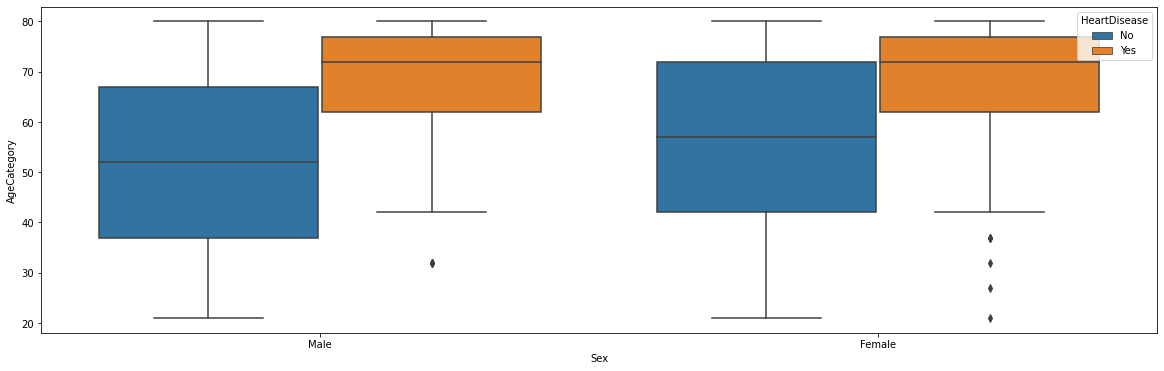

In [64]:
PLT.figure(figsize=(20,6))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">Sex :</font>

In [65]:
X['Sex'].describe()

count       5000
unique         2
top       Female
freq        2571
Name: Sex, dtype: object

In [66]:
X['Sex'].isnull().sum()

0

In [67]:
X['Sex'].value_counts()

Female    2571
Male      2429
Name: Sex, dtype: int64

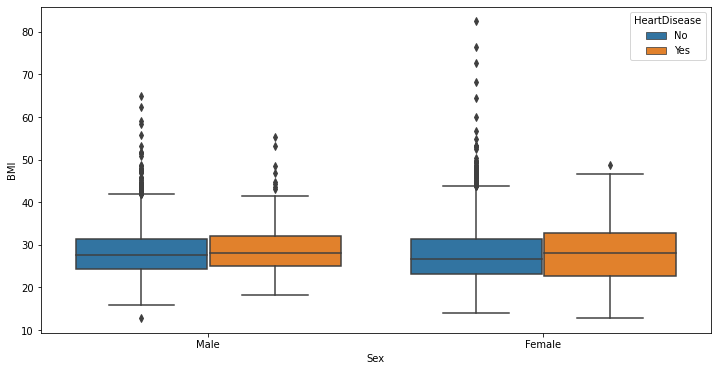

In [68]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Sex'],y=X['BMI'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">SkinCancer :</font>

In [69]:
X['SkinCancer'].describe()

count     5000
unique       2
top         No
freq      4540
Name: SkinCancer, dtype: object

In [70]:
X['SkinCancer'].isnull().sum()

0

In [71]:
X['SkinCancer'].value_counts()

No     4540
Yes     460
Name: SkinCancer, dtype: int64

# <font color="Brown">SkinCancer :</font>

In [72]:
X['SkinCancer'].describe()

count     5000
unique       2
top         No
freq      4540
Name: SkinCancer, dtype: object

In [73]:
X['SkinCancer'].isnull().sum()

0

In [74]:
X['SkinCancer'].value_counts()

No     4540
Yes     460
Name: SkinCancer, dtype: int64

# <font color="Brown">SleepTime :</font>

In [75]:
X['SleepTime'].describe()

count    5000.000000
mean        7.069800
std         1.381923
min         1.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        18.000000
Name: SleepTime, dtype: float64

In [76]:
X['SleepTime'].isna().sum()

0

<AxesSubplot:>

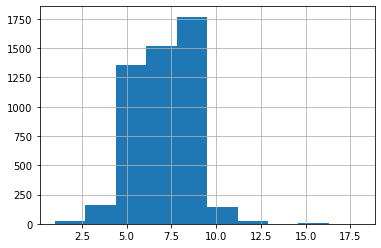

In [77]:
X['SleepTime'].hist()

In [78]:
# X = X.drop(X[X['SleepTime']>16]['SleepTime'].index,axis=0)

<AxesSubplot:>

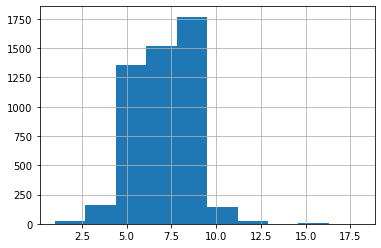

In [79]:
X['SleepTime'].hist()

# <font color="Brown">Smoking :</font>

In [80]:
X['Smoking'].describe()

count     5000
unique       2
top         No
freq      2958
Name: Smoking, dtype: object

In [81]:
X['Smoking'].isnull().sum()

0

In [82]:
X['Smoking'].value_counts()

No     2958
Yes    2042
Name: Smoking, dtype: int64

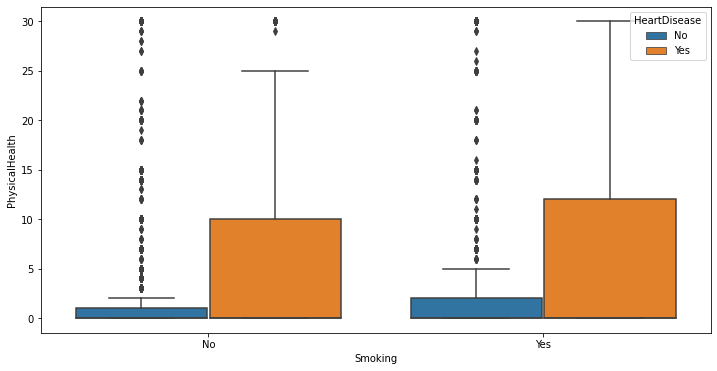

In [83]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Smoking'],y=X['PhysicalHealth'], hue=Y).legend(loc='upper right',title='HeartDisease')

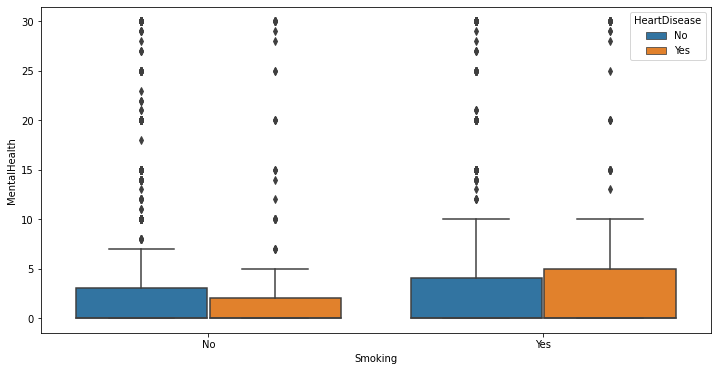

In [84]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Smoking'],y=X['MentalHealth'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">Stroke :</font>

In [85]:
X['Stroke'].describe()

count     5000
unique       2
top         No
freq      4811
Name: Stroke, dtype: object

In [86]:
X['Stroke'].isnull().sum()

0

In [87]:
X['Stroke'].value_counts()

No     4811
Yes     189
Name: Stroke, dtype: int64

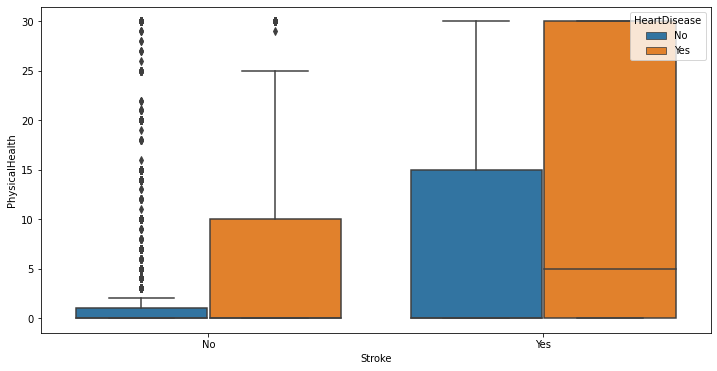

In [88]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Stroke'],y=X['PhysicalHealth'], hue=Y).legend(loc='upper right',title='HeartDisease')

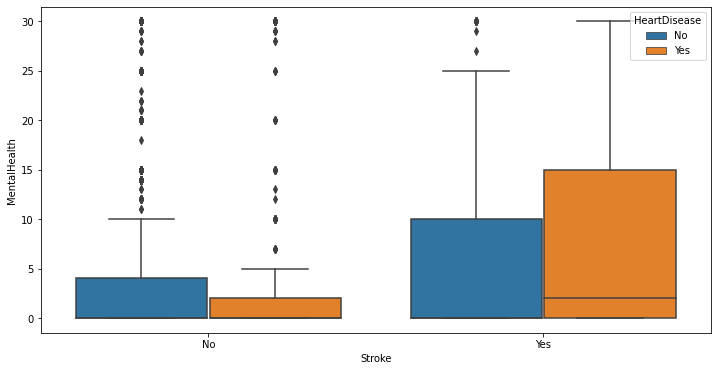

In [89]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Stroke'],y=X['MentalHealth'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Green">One Hot Encode Categorical Label :</font>

In [90]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

def OHC_transformer_single_column(DF,columns):
    
    for column_name in columns:
        label_encoder = LabelEncoder()
        encoded = label_encoder.fit_transform(DF[column_name])
        labels =pd.Series(label_encoder.classes_)

        clmt = ColumnTransformer([(column_name,OneHotEncoder(),[0])], remainder='passthrough')
        clmt_fited_data = clmt.fit_transform(DF[[column_name]]) 
        clmt_fited_data = clmt_fited_data if type(clmt_fited_data)== np.ndarray else clmt_fited_data.toarray()  
        NDF = pd.DataFrame(clmt_fited_data,columns=[f'{column_name}_{x}' for x in labels])
        
        merged = DF.merge(NDF, left_index=True,right_index=True)
        merged = merged.drop(columns=[column_name])
        DF = merged
    return DF

In [91]:
X_OHC = OHC_transformer_single_column(X,CatCols) 
Y = DF.iloc[X_OHC.index]['HeartDisease']
Y_label_encoder = LabelEncoder()
Y_OHC = Y_label_encoder.fit_transform(Y)

In [92]:
NDF = pd.concat([X,Y],axis=1)
NDF_OHC = pd.concat([X_OHC,pd.DataFrame(Y_OHC,columns=['HeartDisease'])],axis=1)

# <font color="Green">Imbalance Data  :</font>

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

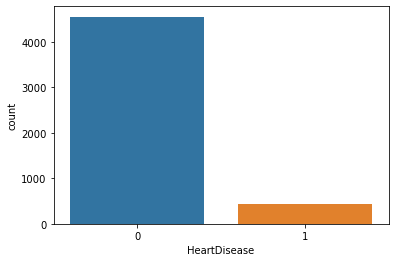

In [93]:
SB.countplot('HeartDisease',data=NDF_OHC)

In [94]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek 
from imblearn.under_sampling import TomekLinks

In [95]:
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X_OHC,pd.DataFrame(Y_OHC,columns=['HeartDisease']))
DF_smote = pd.concat([X_smote,Y_smote],axis=1)

In [96]:
toml = TomekLinks()
X_toml, Y_toml = toml.fit_resample(X_smote,Y_smote)
DF_toml = pd.concat([X_toml,Y_toml],axis=1)

In [97]:
DF_toml

,AgeCategory,BMI,MentalHealth,PhysicalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,HeartDisease
0,67,40.690000,0.000000,0.000000,10.000000,1.000000,0.000000,1.0,0.0,1.000000,...,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
1,77,29.860000,0.000000,0.000000,5.000000,0.000000,1.000000,1.0,0.0,1.000000,...,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
2,62,31.660000,0.000000,5.000000,5.000000,0.000000,1.000000,1.0,0.0,1.000000,...,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
3,62,36.580000,0.000000,0.000000,5.000000,1.000000,0.000000,1.0,0.0,1.000000,...,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
4,67,28.410000,3.000000,10.000000,7.000000,0.000000,1.000000,1.0,0.0,1.000000,...,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9090,67,26.068238,0.000000,0.000000,7.000000,0.604461,0.395539,1.0,0.0,1.000000,...,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
9091,52,30.593080,0.000000,20.351905,9.929619,0.964810,0.035190,1.0,0.0,1.000000,...,0.000000,1.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
9092,67,25.331420,0.000000,0.591935,7.000000,0.000000,1.000000,1.0,0.0,1.000000,...,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
9093,77,25.347202,1.067358,0.000000,7.533679,0.000000,1.000000,1.0,0.0,0.466321,...,0.466321,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1


 # <font color="Green">Normalize  :</font>

 # <font color="Green">feature reduction  :</font>

In [98]:
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

In [99]:
from sklearn.decomposition import PCA,KernelPCA

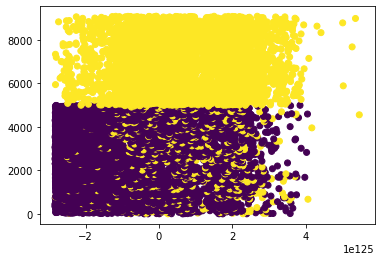

In [100]:
pca = KernelPCA(n_components=2,kernel='poly',random_state=3220,gamma=1,degree=50,coef0=100000)
XPCA = pca.fit_transform(DF_toml.iloc[:,:-1])
PLT.scatter(XPCA[:,0],range(0,len(XPCA)),c=DF_toml.iloc[:,-1])

 # <font color="Green">modeling  :</font>

In [101]:
ZX = pd.concat([pd.DataFrame(XPCA),DF_toml.iloc[:,-1]],axis=1)

X_train,X_test,Y_train,Y_test = train_test_split(ZX.iloc[:,:-1],ZX.iloc[:,-1],random_state=3020)

svm_classifier = SVC(C=1,kernel='rbf')
svm_classifier.fit(X_train,Y_train)
predicted = svm_classifier.predict(X_test)

print(metrics.classification_report(Y_test,predicted))
print(metrics.confusion_matrix(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.81      0.60      0.69      1159
           1       0.67      0.86      0.75      1115

    accuracy                           0.73      2274
   macro avg       0.74      0.73      0.72      2274
weighted avg       0.75      0.73      0.72      2274

[[696 463]
 [159 956]]


In [102]:
X_train,X_test,Y_train,Y_test = train_test_split(DF_toml.iloc[:,:-1],DF_toml.iloc[:,-1],random_state=3020)

svm_classifier = SVC(C=1,kernel='rbf')
svm_classifier.fit(X_train,Y_train)
predicted = svm_classifier.predict(X_test)

print(metrics.classification_report(Y_test,predicted))
print(metrics.confusion_matrix(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71      1159
           1       0.69      0.87      0.77      1115

    accuracy                           0.74      2274
   macro avg       0.76      0.75      0.74      2274
weighted avg       0.76      0.74      0.74      2274

[[717 442]
 [143 972]]


In [105]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
random_forest_gtboost = GradientBoostingClassifier(
    random_state=3020,
    n_estimators=500,
    max_leaf_nodes=10,
    subsample=.9
)
random_forest_gtboost.fit(X_train,Y_train)
random_forest_gtboost.score(X_test,Y_test)
predicted = random_forest_gtboost.predict(X_test)
print(metrics.classification_report(Y_test,predicted))
print(metrics.confusion_matrix(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1159
           1       0.97      0.92      0.95      1115

    accuracy                           0.95      2274
   macro avg       0.95      0.95      0.95      2274
weighted avg       0.95      0.95      0.95      2274

[[1130   29]
 [  89 1026]]


In [112]:
model = CatBoostClassifier(iterations=2000,learning_rate=.01,depth=8,eval_metric='Accuracy',random_state=3020)
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
print(metrics.classification_report(Y_test,Y_predict))
print(metrics.confusion_matrix(Y_test,Y_predict))

0:	learn: 0.8409324	total: 36.6ms	remaining: 2m 26s
1:	learn: 0.8594048	total: 70.7ms	remaining: 2m 21s
2:	learn: 0.8724527	total: 97.7ms	remaining: 2m 10s
3:	learn: 0.8768509	total: 123ms	remaining: 2m 2s
4:	learn: 0.8940038	total: 148ms	remaining: 1m 57s
5:	learn: 0.8937106	total: 173ms	remaining: 1m 55s
6:	learn: 0.8940038	total: 198ms	remaining: 1m 52s
7:	learn: 0.8988418	total: 224ms	remaining: 1m 51s
8:	learn: 0.8985486	total: 254ms	remaining: 1m 52s
9:	learn: 0.8985486	total: 286ms	remaining: 1m 54s
10:	learn: 0.8942970	total: 313ms	remaining: 1m 53s
11:	learn: 0.8947368	total: 380ms	remaining: 2m 6s
12:	learn: 0.8991350	total: 415ms	remaining: 2m 7s
13:	learn: 0.8981088	total: 440ms	remaining: 2m 5s
14:	learn: 0.8997214	total: 468ms	remaining: 2m 4s
15:	learn: 0.8984020	total: 499ms	remaining: 2m 4s
16:	learn: 0.8998681	total: 525ms	remaining: 2m 3s
17:	learn: 0.8994282	total: 558ms	remaining: 2m 3s
18:	learn: 0.8978156	total: 583ms	remaining: 2m 2s
19:	learn: 0.9000147	total: 

160:	learn: 0.9417974	total: 5.86s	remaining: 2m 19s
161:	learn: 0.9416508	total: 5.9s	remaining: 2m 19s
162:	learn: 0.9417974	total: 5.92s	remaining: 2m 19s
163:	learn: 0.9416508	total: 5.95s	remaining: 2m 19s
164:	learn: 0.9423838	total: 5.97s	remaining: 2m 18s
165:	learn: 0.9422372	total: 6s	remaining: 2m 18s
166:	learn: 0.9429702	total: 6.02s	remaining: 2m 18s
167:	learn: 0.9429702	total: 6.05s	remaining: 2m 17s
168:	learn: 0.9429702	total: 6.07s	remaining: 2m 17s
169:	learn: 0.9426770	total: 6.11s	remaining: 2m 17s
170:	learn: 0.9429702	total: 6.13s	remaining: 2m 17s
171:	learn: 0.9429702	total: 6.16s	remaining: 2m 17s
172:	learn: 0.9428236	total: 6.18s	remaining: 2m 16s
173:	learn: 0.9431168	total: 6.21s	remaining: 2m 16s
174:	learn: 0.9429702	total: 6.23s	remaining: 2m 16s
175:	learn: 0.9434101	total: 6.25s	remaining: 2m 15s
176:	learn: 0.9438499	total: 6.28s	remaining: 2m 15s
177:	learn: 0.9439965	total: 6.31s	remaining: 2m 15s
178:	learn: 0.9441431	total: 6.34s	remaining: 2m 1

322:	learn: 0.9529395	total: 10.8s	remaining: 2m 2s
323:	learn: 0.9529395	total: 10.8s	remaining: 2m 2s
324:	learn: 0.9527928	total: 10.8s	remaining: 2m 2s
325:	learn: 0.9527928	total: 10.9s	remaining: 2m 2s
326:	learn: 0.9529395	total: 10.9s	remaining: 2m 2s
327:	learn: 0.9530861	total: 10.9s	remaining: 2m 2s
328:	learn: 0.9529395	total: 10.9s	remaining: 2m 2s
329:	learn: 0.9527928	total: 11s	remaining: 2m 1s
330:	learn: 0.9530861	total: 11s	remaining: 2m 1s
331:	learn: 0.9532327	total: 11s	remaining: 2m 1s
332:	learn: 0.9532327	total: 11s	remaining: 2m 1s
333:	learn: 0.9536725	total: 11.1s	remaining: 2m 1s
334:	learn: 0.9536725	total: 11.1s	remaining: 2m 1s
335:	learn: 0.9536725	total: 11.1s	remaining: 2m 1s
336:	learn: 0.9538191	total: 11.2s	remaining: 2m 1s
337:	learn: 0.9536725	total: 11.2s	remaining: 2m 1s
338:	learn: 0.9536725	total: 11.2s	remaining: 2m
339:	learn: 0.9538191	total: 11.2s	remaining: 2m
340:	learn: 0.9538191	total: 11.3s	remaining: 2m
341:	learn: 0.9541123	total: 

484:	learn: 0.9607096	total: 15.2s	remaining: 1m 49s
485:	learn: 0.9608562	total: 15.2s	remaining: 1m 49s
486:	learn: 0.9607096	total: 15.2s	remaining: 1m 49s
487:	learn: 0.9608562	total: 15.3s	remaining: 1m 49s
488:	learn: 0.9610028	total: 15.3s	remaining: 1m 49s
489:	learn: 0.9608562	total: 15.3s	remaining: 1m 49s
490:	learn: 0.9608562	total: 15.4s	remaining: 1m 49s
491:	learn: 0.9608562	total: 15.4s	remaining: 1m 49s
492:	learn: 0.9607096	total: 15.4s	remaining: 1m 49s
493:	learn: 0.9607096	total: 15.5s	remaining: 1m 49s
494:	learn: 0.9607096	total: 15.5s	remaining: 1m 49s
495:	learn: 0.9607096	total: 15.5s	remaining: 1m 49s
496:	learn: 0.9608562	total: 15.5s	remaining: 1m 49s
497:	learn: 0.9608562	total: 15.6s	remaining: 1m 49s
498:	learn: 0.9608562	total: 15.6s	remaining: 1m 49s
499:	learn: 0.9611494	total: 15.6s	remaining: 1m 49s
500:	learn: 0.9610028	total: 15.6s	remaining: 1m 49s
501:	learn: 0.9612960	total: 15.7s	remaining: 1m 49s
502:	learn: 0.9614426	total: 15.7s	remaining: 

642:	learn: 0.9656942	total: 19.4s	remaining: 1m 41s
643:	learn: 0.9659874	total: 19.4s	remaining: 1m 41s
644:	learn: 0.9661340	total: 19.4s	remaining: 1m 40s
645:	learn: 0.9661340	total: 19.4s	remaining: 1m 40s
646:	learn: 0.9661340	total: 19.5s	remaining: 1m 40s
647:	learn: 0.9661340	total: 19.5s	remaining: 1m 40s
648:	learn: 0.9661340	total: 19.5s	remaining: 1m 40s
649:	learn: 0.9661340	total: 19.5s	remaining: 1m 40s
650:	learn: 0.9661340	total: 19.6s	remaining: 1m 40s
651:	learn: 0.9662806	total: 19.6s	remaining: 1m 40s
652:	learn: 0.9661340	total: 19.6s	remaining: 1m 40s
653:	learn: 0.9661340	total: 19.6s	remaining: 1m 40s
654:	learn: 0.9661340	total: 19.7s	remaining: 1m 40s
655:	learn: 0.9662806	total: 19.7s	remaining: 1m 40s
656:	learn: 0.9661340	total: 19.7s	remaining: 1m 40s
657:	learn: 0.9661340	total: 19.7s	remaining: 1m 40s
658:	learn: 0.9661340	total: 19.8s	remaining: 1m 40s
659:	learn: 0.9662806	total: 19.8s	remaining: 1m 40s
660:	learn: 0.9662806	total: 19.8s	remaining: 

801:	learn: 0.9706788	total: 23.6s	remaining: 1m 33s
802:	learn: 0.9706788	total: 23.6s	remaining: 1m 33s
803:	learn: 0.9706788	total: 23.6s	remaining: 1m 33s
804:	learn: 0.9706788	total: 23.6s	remaining: 1m 33s
805:	learn: 0.9706788	total: 23.7s	remaining: 1m 33s
806:	learn: 0.9706788	total: 23.7s	remaining: 1m 33s
807:	learn: 0.9709720	total: 23.7s	remaining: 1m 33s
808:	learn: 0.9709720	total: 23.7s	remaining: 1m 33s
809:	learn: 0.9709720	total: 23.8s	remaining: 1m 33s
810:	learn: 0.9711186	total: 23.8s	remaining: 1m 33s
811:	learn: 0.9711186	total: 23.8s	remaining: 1m 33s
812:	learn: 0.9711186	total: 23.8s	remaining: 1m 33s
813:	learn: 0.9711186	total: 23.9s	remaining: 1m 33s
814:	learn: 0.9711186	total: 23.9s	remaining: 1m 33s
815:	learn: 0.9711186	total: 23.9s	remaining: 1m 33s
816:	learn: 0.9711186	total: 23.9s	remaining: 1m 33s
817:	learn: 0.9711186	total: 24s	remaining: 1m 33s
818:	learn: 0.9711186	total: 24s	remaining: 1m 33s
819:	learn: 0.9711186	total: 24s	remaining: 1m 33s

963:	learn: 0.9749304	total: 27.8s	remaining: 1m 27s
964:	learn: 0.9749304	total: 27.8s	remaining: 1m 27s
965:	learn: 0.9750770	total: 27.8s	remaining: 1m 27s
966:	learn: 0.9752236	total: 27.8s	remaining: 1m 27s
967:	learn: 0.9752236	total: 27.9s	remaining: 1m 27s
968:	learn: 0.9752236	total: 27.9s	remaining: 1m 27s
969:	learn: 0.9752236	total: 27.9s	remaining: 1m 27s
970:	learn: 0.9752236	total: 28s	remaining: 1m 27s
971:	learn: 0.9752236	total: 28s	remaining: 1m 27s
972:	learn: 0.9753702	total: 28s	remaining: 1m 27s
973:	learn: 0.9752236	total: 28s	remaining: 1m 27s
974:	learn: 0.9752236	total: 28.1s	remaining: 1m 27s
975:	learn: 0.9753702	total: 28.1s	remaining: 1m 27s
976:	learn: 0.9752236	total: 28.1s	remaining: 1m 26s
977:	learn: 0.9753702	total: 28.1s	remaining: 1m 26s
978:	learn: 0.9753702	total: 28.2s	remaining: 1m 26s
979:	learn: 0.9753702	total: 28.2s	remaining: 1m 26s
980:	learn: 0.9753702	total: 28.2s	remaining: 1m 26s
981:	learn: 0.9755168	total: 28.2s	remaining: 1m 26s
9

1123:	learn: 0.9781557	total: 31.9s	remaining: 1m 21s
1124:	learn: 0.9781557	total: 31.9s	remaining: 1m 21s
1125:	learn: 0.9781557	total: 32s	remaining: 1m 21s
1126:	learn: 0.9781557	total: 32s	remaining: 1m 21s
1127:	learn: 0.9783023	total: 32s	remaining: 1m 21s
1128:	learn: 0.9783023	total: 32s	remaining: 1m 21s
1129:	learn: 0.9784489	total: 32.1s	remaining: 1m 21s
1130:	learn: 0.9785955	total: 32.1s	remaining: 1m 21s
1131:	learn: 0.9784489	total: 32.1s	remaining: 1m 21s
1132:	learn: 0.9784489	total: 32.1s	remaining: 1m 21s
1133:	learn: 0.9785955	total: 32.2s	remaining: 1m 21s
1134:	learn: 0.9785955	total: 32.2s	remaining: 1m 21s
1135:	learn: 0.9785955	total: 32.2s	remaining: 1m 21s
1136:	learn: 0.9785955	total: 32.2s	remaining: 1m 21s
1137:	learn: 0.9787421	total: 32.3s	remaining: 1m 21s
1138:	learn: 0.9787421	total: 32.3s	remaining: 1m 21s
1139:	learn: 0.9787421	total: 32.3s	remaining: 1m 21s
1140:	learn: 0.9785955	total: 32.3s	remaining: 1m 21s
1141:	learn: 0.9785955	total: 32.4s	

1282:	learn: 0.9809412	total: 36.4s	remaining: 1m 17s
1283:	learn: 0.9809412	total: 36.4s	remaining: 1m 17s
1284:	learn: 0.9809412	total: 36.4s	remaining: 1m 17s
1285:	learn: 0.9810878	total: 36.5s	remaining: 1m 16s
1286:	learn: 0.9810878	total: 36.5s	remaining: 1m 16s
1287:	learn: 0.9812344	total: 36.5s	remaining: 1m 16s
1288:	learn: 0.9810878	total: 36.5s	remaining: 1m 16s
1289:	learn: 0.9812344	total: 36.6s	remaining: 1m 16s
1290:	learn: 0.9812344	total: 36.6s	remaining: 1m 16s
1291:	learn: 0.9812344	total: 36.6s	remaining: 1m 16s
1292:	learn: 0.9813810	total: 36.7s	remaining: 1m 16s
1293:	learn: 0.9813810	total: 36.7s	remaining: 1m 16s
1294:	learn: 0.9812344	total: 36.7s	remaining: 1m 16s
1295:	learn: 0.9812344	total: 36.7s	remaining: 1m 16s
1296:	learn: 0.9812344	total: 36.8s	remaining: 1m 16s
1297:	learn: 0.9813810	total: 36.8s	remaining: 1m 16s
1298:	learn: 0.9813810	total: 36.8s	remaining: 1m 16s
1299:	learn: 0.9813810	total: 36.8s	remaining: 1m 16s
1300:	learn: 0.9813810	total

1441:	learn: 0.9840199	total: 40.6s	remaining: 1m 12s
1442:	learn: 0.9838733	total: 40.7s	remaining: 1m 12s
1443:	learn: 0.9838733	total: 40.7s	remaining: 1m 12s
1444:	learn: 0.9838733	total: 40.7s	remaining: 1m 11s
1445:	learn: 0.9840199	total: 40.7s	remaining: 1m 11s
1446:	learn: 0.9841665	total: 40.8s	remaining: 1m 11s
1447:	learn: 0.9841665	total: 40.8s	remaining: 1m 11s
1448:	learn: 0.9843132	total: 40.8s	remaining: 1m 11s
1449:	learn: 0.9843132	total: 40.8s	remaining: 1m 11s
1450:	learn: 0.9843132	total: 40.9s	remaining: 1m 11s
1451:	learn: 0.9843132	total: 40.9s	remaining: 1m 11s
1452:	learn: 0.9843132	total: 40.9s	remaining: 1m 11s
1453:	learn: 0.9843132	total: 40.9s	remaining: 1m 11s
1454:	learn: 0.9843132	total: 41s	remaining: 1m 11s
1455:	learn: 0.9843132	total: 41s	remaining: 1m 11s
1456:	learn: 0.9844598	total: 41s	remaining: 1m 11s
1457:	learn: 0.9844598	total: 41s	remaining: 1m 11s
1458:	learn: 0.9844598	total: 41.1s	remaining: 1m 11s
1459:	learn: 0.9843132	total: 41.1s	

1600:	learn: 0.9851928	total: 44.8s	remaining: 1m 7s
1601:	learn: 0.9851928	total: 44.8s	remaining: 1m 7s
1602:	learn: 0.9851928	total: 44.9s	remaining: 1m 7s
1603:	learn: 0.9851928	total: 44.9s	remaining: 1m 7s
1604:	learn: 0.9851928	total: 44.9s	remaining: 1m 7s
1605:	learn: 0.9851928	total: 44.9s	remaining: 1m 6s
1606:	learn: 0.9851928	total: 45s	remaining: 1m 6s
1607:	learn: 0.9851928	total: 45s	remaining: 1m 6s
1608:	learn: 0.9851928	total: 45s	remaining: 1m 6s
1609:	learn: 0.9851928	total: 45s	remaining: 1m 6s
1610:	learn: 0.9851928	total: 45.1s	remaining: 1m 6s
1611:	learn: 0.9851928	total: 45.1s	remaining: 1m 6s
1612:	learn: 0.9851928	total: 45.1s	remaining: 1m 6s
1613:	learn: 0.9851928	total: 45.1s	remaining: 1m 6s
1614:	learn: 0.9851928	total: 45.2s	remaining: 1m 6s
1615:	learn: 0.9851928	total: 45.2s	remaining: 1m 6s
1616:	learn: 0.9853394	total: 45.2s	remaining: 1m 6s
1617:	learn: 0.9853394	total: 45.2s	remaining: 1m 6s
1618:	learn: 0.9853394	total: 45.3s	remaining: 1m 6s
1

1758:	learn: 0.9857792	total: 49s	remaining: 1m 2s
1759:	learn: 0.9859258	total: 49s	remaining: 1m 2s
1760:	learn: 0.9859258	total: 49.1s	remaining: 1m 2s
1761:	learn: 0.9859258	total: 49.1s	remaining: 1m 2s
1762:	learn: 0.9859258	total: 49.1s	remaining: 1m 2s
1763:	learn: 0.9859258	total: 49.1s	remaining: 1m 2s
1764:	learn: 0.9859258	total: 49.2s	remaining: 1m 2s
1765:	learn: 0.9859258	total: 49.2s	remaining: 1m 2s
1766:	learn: 0.9859258	total: 49.2s	remaining: 1m 2s
1767:	learn: 0.9859258	total: 49.3s	remaining: 1m 2s
1768:	learn: 0.9859258	total: 49.3s	remaining: 1m 2s
1769:	learn: 0.9859258	total: 49.3s	remaining: 1m 2s
1770:	learn: 0.9859258	total: 49.3s	remaining: 1m 2s
1771:	learn: 0.9859258	total: 49.4s	remaining: 1m 2s
1772:	learn: 0.9859258	total: 49.4s	remaining: 1m 2s
1773:	learn: 0.9859258	total: 49.4s	remaining: 1m 2s
1774:	learn: 0.9859258	total: 49.5s	remaining: 1m 2s
1775:	learn: 0.9859258	total: 49.5s	remaining: 1m 1s
1776:	learn: 0.9859258	total: 49.5s	remaining: 1m 

1919:	learn: 0.9876851	total: 53.4s	remaining: 57.9s
1920:	learn: 0.9876851	total: 53.5s	remaining: 57.9s
1921:	learn: 0.9876851	total: 53.5s	remaining: 57.8s
1922:	learn: 0.9876851	total: 53.5s	remaining: 57.8s
1923:	learn: 0.9876851	total: 53.6s	remaining: 57.8s
1924:	learn: 0.9876851	total: 53.6s	remaining: 57.8s
1925:	learn: 0.9876851	total: 53.6s	remaining: 57.7s
1926:	learn: 0.9876851	total: 53.6s	remaining: 57.7s
1927:	learn: 0.9876851	total: 53.7s	remaining: 57.7s
1928:	learn: 0.9876851	total: 53.7s	remaining: 57.6s
1929:	learn: 0.9876851	total: 53.7s	remaining: 57.6s
1930:	learn: 0.9876851	total: 53.7s	remaining: 57.6s
1931:	learn: 0.9876851	total: 53.8s	remaining: 57.6s
1932:	learn: 0.9876851	total: 53.8s	remaining: 57.5s
1933:	learn: 0.9876851	total: 53.8s	remaining: 57.5s
1934:	learn: 0.9876851	total: 53.8s	remaining: 57.5s
1935:	learn: 0.9876851	total: 53.9s	remaining: 57.4s
1936:	learn: 0.9876851	total: 53.9s	remaining: 57.4s
1937:	learn: 0.9876851	total: 53.9s	remaining:

2078:	learn: 0.9887113	total: 57.7s	remaining: 53.3s
2079:	learn: 0.9887113	total: 57.7s	remaining: 53.3s
2080:	learn: 0.9887113	total: 57.7s	remaining: 53.2s
2081:	learn: 0.9887113	total: 57.7s	remaining: 53.2s
2082:	learn: 0.9887113	total: 57.8s	remaining: 53.2s
2083:	learn: 0.9887113	total: 57.8s	remaining: 53.1s
2084:	learn: 0.9887113	total: 57.8s	remaining: 53.1s
2085:	learn: 0.9887113	total: 57.8s	remaining: 53.1s
2086:	learn: 0.9887113	total: 57.9s	remaining: 53.1s
2087:	learn: 0.9887113	total: 57.9s	remaining: 53s
2088:	learn: 0.9887113	total: 57.9s	remaining: 53s
2089:	learn: 0.9887113	total: 58s	remaining: 53s
2090:	learn: 0.9887113	total: 58s	remaining: 52.9s
2091:	learn: 0.9887113	total: 58s	remaining: 52.9s
2092:	learn: 0.9887113	total: 58s	remaining: 52.9s
2093:	learn: 0.9887113	total: 58.1s	remaining: 52.8s
2094:	learn: 0.9887113	total: 58.1s	remaining: 52.8s
2095:	learn: 0.9887113	total: 58.1s	remaining: 52.8s
2096:	learn: 0.9887113	total: 58.1s	remaining: 52.8s
2097:	l

2238:	learn: 0.9894444	total: 1m 1s	remaining: 48.6s
2239:	learn: 0.9895910	total: 1m 1s	remaining: 48.6s
2240:	learn: 0.9895910	total: 1m 1s	remaining: 48.6s
2241:	learn: 0.9895910	total: 1m 1s	remaining: 48.5s
2242:	learn: 0.9895910	total: 1m 1s	remaining: 48.5s
2243:	learn: 0.9895910	total: 1m 1s	remaining: 48.5s
2244:	learn: 0.9895910	total: 1m 1s	remaining: 48.4s
2245:	learn: 0.9895910	total: 1m 1s	remaining: 48.4s
2246:	learn: 0.9895910	total: 1m 2s	remaining: 48.4s
2247:	learn: 0.9895910	total: 1m 2s	remaining: 48.4s
2248:	learn: 0.9895910	total: 1m 2s	remaining: 48.3s
2249:	learn: 0.9895910	total: 1m 2s	remaining: 48.3s
2250:	learn: 0.9895910	total: 1m 2s	remaining: 48.3s
2251:	learn: 0.9895910	total: 1m 2s	remaining: 48.2s
2252:	learn: 0.9895910	total: 1m 2s	remaining: 48.2s
2253:	learn: 0.9895910	total: 1m 2s	remaining: 48.2s
2254:	learn: 0.9895910	total: 1m 2s	remaining: 48.1s
2255:	learn: 0.9895910	total: 1m 2s	remaining: 48.1s
2256:	learn: 0.9895910	total: 1m 2s	remaining:

2399:	learn: 0.9910570	total: 1m 6s	remaining: 44s
2400:	learn: 0.9910570	total: 1m 6s	remaining: 44s
2401:	learn: 0.9910570	total: 1m 6s	remaining: 44s
2402:	learn: 0.9910570	total: 1m 6s	remaining: 43.9s
2403:	learn: 0.9910570	total: 1m 6s	remaining: 43.9s
2404:	learn: 0.9910570	total: 1m 6s	remaining: 43.9s
2405:	learn: 0.9910570	total: 1m 6s	remaining: 43.8s
2406:	learn: 0.9910570	total: 1m 6s	remaining: 43.8s
2407:	learn: 0.9910570	total: 1m 6s	remaining: 43.8s
2408:	learn: 0.9910570	total: 1m 6s	remaining: 43.8s
2409:	learn: 0.9910570	total: 1m 6s	remaining: 43.7s
2410:	learn: 0.9910570	total: 1m 6s	remaining: 43.7s
2411:	learn: 0.9910570	total: 1m 6s	remaining: 43.7s
2412:	learn: 0.9910570	total: 1m 6s	remaining: 43.6s
2413:	learn: 0.9910570	total: 1m 6s	remaining: 43.6s
2414:	learn: 0.9912036	total: 1m 6s	remaining: 43.6s
2415:	learn: 0.9912036	total: 1m 6s	remaining: 43.6s
2416:	learn: 0.9912036	total: 1m 6s	remaining: 43.5s
2417:	learn: 0.9912036	total: 1m 6s	remaining: 43.5s

2559:	learn: 0.9925231	total: 1m 10s	remaining: 39.5s
2560:	learn: 0.9925231	total: 1m 10s	remaining: 39.4s
2561:	learn: 0.9925231	total: 1m 10s	remaining: 39.4s
2562:	learn: 0.9925231	total: 1m 10s	remaining: 39.4s
2563:	learn: 0.9925231	total: 1m 10s	remaining: 39.3s
2564:	learn: 0.9925231	total: 1m 10s	remaining: 39.3s
2565:	learn: 0.9925231	total: 1m 10s	remaining: 39.3s
2566:	learn: 0.9925231	total: 1m 10s	remaining: 39.3s
2567:	learn: 0.9925231	total: 1m 10s	remaining: 39.2s
2568:	learn: 0.9925231	total: 1m 10s	remaining: 39.2s
2569:	learn: 0.9925231	total: 1m 10s	remaining: 39.2s
2570:	learn: 0.9925231	total: 1m 10s	remaining: 39.1s
2571:	learn: 0.9925231	total: 1m 10s	remaining: 39.1s
2572:	learn: 0.9926697	total: 1m 10s	remaining: 39.1s
2573:	learn: 0.9928163	total: 1m 10s	remaining: 39.1s
2574:	learn: 0.9928163	total: 1m 10s	remaining: 39s
2575:	learn: 0.9928163	total: 1m 10s	remaining: 39s
2576:	learn: 0.9926697	total: 1m 10s	remaining: 39s
2577:	learn: 0.9926697	total: 1m 1

2719:	learn: 0.9934027	total: 1m 14s	remaining: 34.9s
2720:	learn: 0.9935493	total: 1m 14s	remaining: 34.9s
2721:	learn: 0.9935493	total: 1m 14s	remaining: 34.9s
2722:	learn: 0.9935493	total: 1m 14s	remaining: 34.9s
2723:	learn: 0.9935493	total: 1m 14s	remaining: 34.8s
2724:	learn: 0.9935493	total: 1m 14s	remaining: 34.8s
2725:	learn: 0.9935493	total: 1m 14s	remaining: 34.8s
2726:	learn: 0.9935493	total: 1m 14s	remaining: 34.8s
2727:	learn: 0.9935493	total: 1m 14s	remaining: 34.7s
2728:	learn: 0.9935493	total: 1m 14s	remaining: 34.7s
2729:	learn: 0.9935493	total: 1m 14s	remaining: 34.7s
2730:	learn: 0.9935493	total: 1m 14s	remaining: 34.6s
2731:	learn: 0.9935493	total: 1m 14s	remaining: 34.6s
2732:	learn: 0.9935493	total: 1m 14s	remaining: 34.6s
2733:	learn: 0.9935493	total: 1m 14s	remaining: 34.6s
2734:	learn: 0.9935493	total: 1m 14s	remaining: 34.5s
2735:	learn: 0.9935493	total: 1m 14s	remaining: 34.5s
2736:	learn: 0.9935493	total: 1m 14s	remaining: 34.5s
2737:	learn: 0.9935493	total

2879:	learn: 0.9938425	total: 1m 18s	remaining: 30.5s
2880:	learn: 0.9938425	total: 1m 18s	remaining: 30.5s
2881:	learn: 0.9938425	total: 1m 18s	remaining: 30.4s
2882:	learn: 0.9938425	total: 1m 18s	remaining: 30.4s
2883:	learn: 0.9938425	total: 1m 18s	remaining: 30.4s
2884:	learn: 0.9938425	total: 1m 18s	remaining: 30.3s
2885:	learn: 0.9938425	total: 1m 18s	remaining: 30.3s
2886:	learn: 0.9938425	total: 1m 18s	remaining: 30.3s
2887:	learn: 0.9938425	total: 1m 18s	remaining: 30.3s
2888:	learn: 0.9939892	total: 1m 18s	remaining: 30.2s
2889:	learn: 0.9939892	total: 1m 18s	remaining: 30.2s
2890:	learn: 0.9939892	total: 1m 18s	remaining: 30.2s
2891:	learn: 0.9939892	total: 1m 18s	remaining: 30.2s
2892:	learn: 0.9939892	total: 1m 18s	remaining: 30.1s
2893:	learn: 0.9938425	total: 1m 18s	remaining: 30.1s
2894:	learn: 0.9939892	total: 1m 18s	remaining: 30.1s
2895:	learn: 0.9939892	total: 1m 18s	remaining: 30s
2896:	learn: 0.9939892	total: 1m 18s	remaining: 30s
2897:	learn: 0.9939892	total: 1m

3038:	learn: 0.9944290	total: 1m 22s	remaining: 26.1s
3039:	learn: 0.9944290	total: 1m 22s	remaining: 26.1s
3040:	learn: 0.9944290	total: 1m 22s	remaining: 26.1s
3041:	learn: 0.9944290	total: 1m 22s	remaining: 26s
3042:	learn: 0.9944290	total: 1m 22s	remaining: 26s
3043:	learn: 0.9944290	total: 1m 22s	remaining: 26s
3044:	learn: 0.9944290	total: 1m 22s	remaining: 25.9s
3045:	learn: 0.9944290	total: 1m 22s	remaining: 25.9s
3046:	learn: 0.9945756	total: 1m 22s	remaining: 25.9s
3047:	learn: 0.9945756	total: 1m 22s	remaining: 25.9s
3048:	learn: 0.9945756	total: 1m 22s	remaining: 25.8s
3049:	learn: 0.9945756	total: 1m 22s	remaining: 25.8s
3050:	learn: 0.9945756	total: 1m 22s	remaining: 25.8s
3051:	learn: 0.9945756	total: 1m 22s	remaining: 25.7s
3052:	learn: 0.9945756	total: 1m 22s	remaining: 25.7s
3053:	learn: 0.9945756	total: 1m 22s	remaining: 25.7s
3054:	learn: 0.9945756	total: 1m 22s	remaining: 25.7s
3055:	learn: 0.9945756	total: 1m 23s	remaining: 25.6s
3056:	learn: 0.9947222	total: 1m 2

3191:	learn: 0.9953086	total: 1m 26s	remaining: 22s
3192:	learn: 0.9953086	total: 1m 26s	remaining: 21.9s
3193:	learn: 0.9953086	total: 1m 26s	remaining: 21.9s
3194:	learn: 0.9953086	total: 1m 26s	remaining: 21.9s
3195:	learn: 0.9953086	total: 1m 26s	remaining: 21.9s
3196:	learn: 0.9953086	total: 1m 26s	remaining: 21.8s
3197:	learn: 0.9953086	total: 1m 26s	remaining: 21.8s
3198:	learn: 0.9953086	total: 1m 27s	remaining: 21.8s
3199:	learn: 0.9953086	total: 1m 27s	remaining: 21.8s
3200:	learn: 0.9953086	total: 1m 27s	remaining: 21.7s
3201:	learn: 0.9953086	total: 1m 27s	remaining: 21.7s
3202:	learn: 0.9953086	total: 1m 27s	remaining: 21.7s
3203:	learn: 0.9953086	total: 1m 27s	remaining: 21.7s
3204:	learn: 0.9953086	total: 1m 27s	remaining: 21.6s
3205:	learn: 0.9953086	total: 1m 27s	remaining: 21.6s
3206:	learn: 0.9953086	total: 1m 27s	remaining: 21.6s
3207:	learn: 0.9953086	total: 1m 27s	remaining: 21.5s
3208:	learn: 0.9953086	total: 1m 27s	remaining: 21.5s
3209:	learn: 0.9953086	total: 

3347:	learn: 0.9957484	total: 1m 31s	remaining: 17.7s
3348:	learn: 0.9957484	total: 1m 31s	remaining: 17.7s
3349:	learn: 0.9957484	total: 1m 31s	remaining: 17.7s
3350:	learn: 0.9957484	total: 1m 31s	remaining: 17.6s
3351:	learn: 0.9957484	total: 1m 31s	remaining: 17.6s
3352:	learn: 0.9957484	total: 1m 31s	remaining: 17.6s
3353:	learn: 0.9957484	total: 1m 31s	remaining: 17.6s
3354:	learn: 0.9957484	total: 1m 31s	remaining: 17.5s
3355:	learn: 0.9957484	total: 1m 31s	remaining: 17.5s
3356:	learn: 0.9957484	total: 1m 31s	remaining: 17.5s
3357:	learn: 0.9957484	total: 1m 31s	remaining: 17.4s
3358:	learn: 0.9958950	total: 1m 31s	remaining: 17.4s
3359:	learn: 0.9958950	total: 1m 31s	remaining: 17.4s
3360:	learn: 0.9958950	total: 1m 31s	remaining: 17.4s
3361:	learn: 0.9958950	total: 1m 31s	remaining: 17.3s
3362:	learn: 0.9958950	total: 1m 31s	remaining: 17.3s
3363:	learn: 0.9958950	total: 1m 31s	remaining: 17.3s
3364:	learn: 0.9958950	total: 1m 31s	remaining: 17.3s
3365:	learn: 0.9958950	total

3500:	learn: 0.9961882	total: 1m 34s	remaining: 13.5s
3501:	learn: 0.9961882	total: 1m 35s	remaining: 13.5s
3502:	learn: 0.9963348	total: 1m 35s	remaining: 13.5s
3503:	learn: 0.9963348	total: 1m 35s	remaining: 13.5s
3504:	learn: 0.9963348	total: 1m 35s	remaining: 13.4s
3505:	learn: 0.9963348	total: 1m 35s	remaining: 13.4s
3506:	learn: 0.9963348	total: 1m 35s	remaining: 13.4s
3507:	learn: 0.9961882	total: 1m 35s	remaining: 13.3s
3508:	learn: 0.9961882	total: 1m 35s	remaining: 13.3s
3509:	learn: 0.9961882	total: 1m 35s	remaining: 13.3s
3510:	learn: 0.9963348	total: 1m 35s	remaining: 13.3s
3511:	learn: 0.9963348	total: 1m 35s	remaining: 13.2s
3512:	learn: 0.9963348	total: 1m 35s	remaining: 13.2s
3513:	learn: 0.9963348	total: 1m 35s	remaining: 13.2s
3514:	learn: 0.9963348	total: 1m 35s	remaining: 13.2s
3515:	learn: 0.9963348	total: 1m 35s	remaining: 13.1s
3516:	learn: 0.9963348	total: 1m 35s	remaining: 13.1s
3517:	learn: 0.9963348	total: 1m 35s	remaining: 13.1s
3518:	learn: 0.9963348	total

3659:	learn: 0.9970679	total: 1m 39s	remaining: 9.21s
3660:	learn: 0.9970679	total: 1m 39s	remaining: 9.18s
3661:	learn: 0.9970679	total: 1m 39s	remaining: 9.16s
3662:	learn: 0.9970679	total: 1m 39s	remaining: 9.13s
3663:	learn: 0.9970679	total: 1m 39s	remaining: 9.1s
3664:	learn: 0.9970679	total: 1m 39s	remaining: 9.07s
3665:	learn: 0.9970679	total: 1m 39s	remaining: 9.05s
3666:	learn: 0.9970679	total: 1m 39s	remaining: 9.02s
3667:	learn: 0.9970679	total: 1m 39s	remaining: 8.99s
3668:	learn: 0.9970679	total: 1m 39s	remaining: 8.97s
3669:	learn: 0.9970679	total: 1m 39s	remaining: 8.94s
3670:	learn: 0.9970679	total: 1m 39s	remaining: 8.91s
3671:	learn: 0.9970679	total: 1m 39s	remaining: 8.88s
3672:	learn: 0.9970679	total: 1m 39s	remaining: 8.86s
3673:	learn: 0.9970679	total: 1m 39s	remaining: 8.83s
3674:	learn: 0.9970679	total: 1m 39s	remaining: 8.8s
3675:	learn: 0.9970679	total: 1m 39s	remaining: 8.78s
3676:	learn: 0.9970679	total: 1m 39s	remaining: 8.75s
3677:	learn: 0.9970679	total: 

3816:	learn: 0.9976543	total: 1m 43s	remaining: 4.96s
3817:	learn: 0.9976543	total: 1m 43s	remaining: 4.93s
3818:	learn: 0.9976543	total: 1m 43s	remaining: 4.91s
3819:	learn: 0.9976543	total: 1m 43s	remaining: 4.88s
3820:	learn: 0.9976543	total: 1m 43s	remaining: 4.85s
3821:	learn: 0.9976543	total: 1m 43s	remaining: 4.83s
3822:	learn: 0.9976543	total: 1m 43s	remaining: 4.8s
3823:	learn: 0.9976543	total: 1m 43s	remaining: 4.77s
3824:	learn: 0.9976543	total: 1m 43s	remaining: 4.74s
3825:	learn: 0.9976543	total: 1m 43s	remaining: 4.72s
3826:	learn: 0.9976543	total: 1m 43s	remaining: 4.69s
3827:	learn: 0.9976543	total: 1m 43s	remaining: 4.66s
3828:	learn: 0.9976543	total: 1m 43s	remaining: 4.63s
3829:	learn: 0.9976543	total: 1m 43s	remaining: 4.61s
3830:	learn: 0.9976543	total: 1m 43s	remaining: 4.58s
3831:	learn: 0.9976543	total: 1m 43s	remaining: 4.55s
3832:	learn: 0.9976543	total: 1m 43s	remaining: 4.53s
3833:	learn: 0.9976543	total: 1m 43s	remaining: 4.5s
3834:	learn: 0.9976543	total: 

3974:	learn: 0.9978009	total: 1m 48s	remaining: 680ms
3975:	learn: 0.9978009	total: 1m 48s	remaining: 653ms
3976:	learn: 0.9978009	total: 1m 48s	remaining: 626ms
3977:	learn: 0.9978009	total: 1m 48s	remaining: 599ms
3978:	learn: 0.9978009	total: 1m 48s	remaining: 571ms
3979:	learn: 0.9978009	total: 1m 48s	remaining: 544ms
3980:	learn: 0.9978009	total: 1m 48s	remaining: 517ms
3981:	learn: 0.9978009	total: 1m 48s	remaining: 490ms
3982:	learn: 0.9978009	total: 1m 48s	remaining: 463ms
3983:	learn: 0.9978009	total: 1m 48s	remaining: 435ms
3984:	learn: 0.9978009	total: 1m 48s	remaining: 408ms
3985:	learn: 0.9978009	total: 1m 48s	remaining: 381ms
3986:	learn: 0.9978009	total: 1m 48s	remaining: 354ms
3987:	learn: 0.9978009	total: 1m 48s	remaining: 327ms
3988:	learn: 0.9978009	total: 1m 48s	remaining: 299ms
3989:	learn: 0.9978009	total: 1m 48s	remaining: 272ms
3990:	learn: 0.9978009	total: 1m 48s	remaining: 245ms
3991:	learn: 0.9978009	total: 1m 48s	remaining: 218ms
3992:	learn: 0.9978009	total

In [113]:
model = CatBoostClassifier(iterations=2000,learning_rate=.01,depth=13,eval_metric='Accuracy',random_state=3020)
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
print(metrics.classification_report(Y_test,Y_predict))
print(metrics.confusion_matrix(Y_test,Y_predict))

0:	learn: 0.8756781	total: 699ms	remaining: 23m 16s
1:	learn: 0.9143821	total: 1.49s	remaining: 24m 51s
2:	learn: 0.9121830	total: 2.32s	remaining: 25m 45s
3:	learn: 0.9215658	total: 3.16s	remaining: 26m 18s
4:	learn: 0.9225920	total: 4.02s	remaining: 26m 43s
5:	learn: 0.9249377	total: 4.9s	remaining: 27m 7s
6:	learn: 0.9296291	total: 5.76s	remaining: 27m 21s
7:	learn: 0.9321214	total: 6.64s	remaining: 27m 32s
8:	learn: 0.9349069	total: 7.6s	remaining: 28m 1s
9:	learn: 0.9346137	total: 8.39s	remaining: 27m 50s
10:	learn: 0.9369594	total: 9.11s	remaining: 27m 26s
11:	learn: 0.9365196	total: 9.81s	remaining: 27m 5s
12:	learn: 0.9347603	total: 10.5s	remaining: 26m 45s
13:	learn: 0.9359331	total: 11.5s	remaining: 27m 9s
14:	learn: 0.9365196	total: 12.4s	remaining: 27m 27s
15:	learn: 0.9359331	total: 13.4s	remaining: 27m 38s
16:	learn: 0.9363730	total: 14.1s	remaining: 27m 19s
17:	learn: 0.9360798	total: 14.7s	remaining: 27m 2s
18:	learn: 0.9362264	total: 15.5s	remaining: 26m 53s
19:	learn:

154:	learn: 0.9655476	total: 1m 51s	remaining: 22m 10s
155:	learn: 0.9656942	total: 1m 52s	remaining: 22m 9s
156:	learn: 0.9658408	total: 1m 53s	remaining: 22m 7s
157:	learn: 0.9659874	total: 1m 53s	remaining: 22m 6s
158:	learn: 0.9662806	total: 1m 54s	remaining: 22m 5s
159:	learn: 0.9664272	total: 1m 55s	remaining: 22m 3s
160:	learn: 0.9664272	total: 1m 55s	remaining: 22m 2s
161:	learn: 0.9661340	total: 1m 56s	remaining: 22m 1s
162:	learn: 0.9662806	total: 1m 57s	remaining: 21m 59s
163:	learn: 0.9662806	total: 1m 57s	remaining: 21m 58s
164:	learn: 0.9664272	total: 1m 58s	remaining: 21m 58s
165:	learn: 0.9662806	total: 1m 59s	remaining: 21m 57s
166:	learn: 0.9664272	total: 1m 59s	remaining: 21m 56s
167:	learn: 0.9662806	total: 2m	remaining: 21m 55s
168:	learn: 0.9664272	total: 2m 1s	remaining: 21m 54s
169:	learn: 0.9667204	total: 2m 2s	remaining: 21m 53s
170:	learn: 0.9668670	total: 2m 2s	remaining: 21m 52s
171:	learn: 0.9668670	total: 2m 3s	remaining: 21m 51s
172:	learn: 0.9670136	tot

305:	learn: 0.9777159	total: 3m 36s	remaining: 19m 58s
306:	learn: 0.9777159	total: 3m 37s	remaining: 19m 58s
307:	learn: 0.9777159	total: 3m 38s	remaining: 19m 57s
308:	learn: 0.9777159	total: 3m 38s	remaining: 19m 56s
309:	learn: 0.9777159	total: 3m 39s	remaining: 19m 56s
310:	learn: 0.9778625	total: 3m 40s	remaining: 19m 55s
311:	learn: 0.9778625	total: 3m 40s	remaining: 19m 54s
312:	learn: 0.9781557	total: 3m 41s	remaining: 19m 53s
313:	learn: 0.9781557	total: 3m 42s	remaining: 19m 53s
314:	learn: 0.9784489	total: 3m 42s	remaining: 19m 52s
315:	learn: 0.9787421	total: 3m 43s	remaining: 19m 52s
316:	learn: 0.9790353	total: 3m 44s	remaining: 19m 51s
317:	learn: 0.9790353	total: 3m 45s	remaining: 19m 50s
318:	learn: 0.9791819	total: 3m 45s	remaining: 19m 49s
319:	learn: 0.9793285	total: 3m 46s	remaining: 19m 49s
320:	learn: 0.9794752	total: 3m 47s	remaining: 19m 48s
321:	learn: 0.9794752	total: 3m 47s	remaining: 19m 47s
322:	learn: 0.9794752	total: 3m 48s	remaining: 19m 46s
323:	learn

455:	learn: 0.9835801	total: 5m 24s	remaining: 18m 17s
456:	learn: 0.9835801	total: 5m 24s	remaining: 18m 16s
457:	learn: 0.9837267	total: 5m 25s	remaining: 18m 16s
458:	learn: 0.9837267	total: 5m 26s	remaining: 18m 15s
459:	learn: 0.9837267	total: 5m 27s	remaining: 18m 14s
460:	learn: 0.9840199	total: 5m 27s	remaining: 18m 14s
461:	learn: 0.9840199	total: 5m 28s	remaining: 18m 13s
462:	learn: 0.9840199	total: 5m 29s	remaining: 18m 12s
463:	learn: 0.9840199	total: 5m 29s	remaining: 18m 12s
464:	learn: 0.9840199	total: 5m 30s	remaining: 18m 11s
465:	learn: 0.9841665	total: 5m 31s	remaining: 18m 11s
466:	learn: 0.9843132	total: 5m 32s	remaining: 18m 10s
467:	learn: 0.9843132	total: 5m 32s	remaining: 18m 9s
468:	learn: 0.9844598	total: 5m 33s	remaining: 18m 8s
469:	learn: 0.9844598	total: 5m 34s	remaining: 18m 8s
470:	learn: 0.9844598	total: 5m 34s	remaining: 18m 7s
471:	learn: 0.9844598	total: 5m 35s	remaining: 18m 6s
472:	learn: 0.9846064	total: 5m 36s	remaining: 18m 5s
473:	learn: 0.98

606:	learn: 0.9885647	total: 7m 7s	remaining: 16m 20s
607:	learn: 0.9885647	total: 7m 7s	remaining: 16m 19s
608:	learn: 0.9885647	total: 7m 8s	remaining: 16m 18s
609:	learn: 0.9884181	total: 7m 9s	remaining: 16m 18s
610:	learn: 0.9885647	total: 7m 10s	remaining: 16m 17s
611:	learn: 0.9887113	total: 7m 10s	remaining: 16m 16s
612:	learn: 0.9887113	total: 7m 11s	remaining: 16m 16s
613:	learn: 0.9888579	total: 7m 12s	remaining: 16m 15s
614:	learn: 0.9888579	total: 7m 12s	remaining: 16m 14s
615:	learn: 0.9888579	total: 7m 13s	remaining: 16m 13s
616:	learn: 0.9888579	total: 7m 14s	remaining: 16m 13s
617:	learn: 0.9888579	total: 7m 14s	remaining: 16m 12s
618:	learn: 0.9888579	total: 7m 15s	remaining: 16m 11s
619:	learn: 0.9888579	total: 7m 16s	remaining: 16m 10s
620:	learn: 0.9888579	total: 7m 16s	remaining: 16m 9s
621:	learn: 0.9888579	total: 7m 17s	remaining: 16m 9s
622:	learn: 0.9888579	total: 7m 18s	remaining: 16m 8s
623:	learn: 0.9888579	total: 7m 18s	remaining: 16m 7s
624:	learn: 0.9888

756:	learn: 0.9923765	total: 8m 46s	remaining: 14m 24s
757:	learn: 0.9923765	total: 8m 46s	remaining: 14m 23s
758:	learn: 0.9923765	total: 8m 47s	remaining: 14m 22s
759:	learn: 0.9923765	total: 8m 48s	remaining: 14m 22s
760:	learn: 0.9923765	total: 8m 48s	remaining: 14m 21s
761:	learn: 0.9925231	total: 8m 49s	remaining: 14m 20s
762:	learn: 0.9925231	total: 8m 50s	remaining: 14m 19s
763:	learn: 0.9925231	total: 8m 50s	remaining: 14m 18s
764:	learn: 0.9925231	total: 8m 51s	remaining: 14m 18s
765:	learn: 0.9925231	total: 8m 52s	remaining: 14m 17s
766:	learn: 0.9925231	total: 8m 52s	remaining: 14m 16s
767:	learn: 0.9925231	total: 8m 53s	remaining: 14m 15s
768:	learn: 0.9925231	total: 8m 54s	remaining: 14m 15s
769:	learn: 0.9925231	total: 8m 54s	remaining: 14m 14s
770:	learn: 0.9925231	total: 8m 55s	remaining: 14m 13s
771:	learn: 0.9925231	total: 8m 56s	remaining: 14m 12s
772:	learn: 0.9925231	total: 8m 56s	remaining: 14m 12s
773:	learn: 0.9925231	total: 8m 57s	remaining: 14m 11s
774:	learn

906:	learn: 0.9951620	total: 10m 24s	remaining: 12m 32s
907:	learn: 0.9951620	total: 10m 25s	remaining: 12m 32s
908:	learn: 0.9951620	total: 10m 26s	remaining: 12m 31s
909:	learn: 0.9951620	total: 10m 26s	remaining: 12m 30s
910:	learn: 0.9951620	total: 10m 27s	remaining: 12m 29s
911:	learn: 0.9951620	total: 10m 27s	remaining: 12m 29s
912:	learn: 0.9951620	total: 10m 28s	remaining: 12m 28s
913:	learn: 0.9951620	total: 10m 29s	remaining: 12m 27s
914:	learn: 0.9951620	total: 10m 29s	remaining: 12m 26s
915:	learn: 0.9951620	total: 10m 30s	remaining: 12m 26s
916:	learn: 0.9951620	total: 10m 31s	remaining: 12m 25s
917:	learn: 0.9951620	total: 10m 31s	remaining: 12m 24s
918:	learn: 0.9951620	total: 10m 32s	remaining: 12m 24s
919:	learn: 0.9951620	total: 10m 33s	remaining: 12m 23s
920:	learn: 0.9951620	total: 10m 33s	remaining: 12m 22s
921:	learn: 0.9951620	total: 10m 34s	remaining: 12m 21s
922:	learn: 0.9951620	total: 10m 35s	remaining: 12m 21s
923:	learn: 0.9953086	total: 10m 35s	remaining: 

1053:	learn: 0.9966281	total: 12m	remaining: 10m 46s
1054:	learn: 0.9966281	total: 12m 1s	remaining: 10m 45s
1055:	learn: 0.9966281	total: 12m 1s	remaining: 10m 45s
1056:	learn: 0.9966281	total: 12m 2s	remaining: 10m 44s
1057:	learn: 0.9966281	total: 12m 3s	remaining: 10m 43s
1058:	learn: 0.9966281	total: 12m 3s	remaining: 10m 43s
1059:	learn: 0.9966281	total: 12m 4s	remaining: 10m 42s
1060:	learn: 0.9966281	total: 12m 4s	remaining: 10m 41s
1061:	learn: 0.9966281	total: 12m 5s	remaining: 10m 40s
1062:	learn: 0.9966281	total: 12m 6s	remaining: 10m 40s
1063:	learn: 0.9966281	total: 12m 6s	remaining: 10m 39s
1064:	learn: 0.9966281	total: 12m 7s	remaining: 10m 38s
1065:	learn: 0.9966281	total: 12m 8s	remaining: 10m 38s
1066:	learn: 0.9966281	total: 12m 8s	remaining: 10m 37s
1067:	learn: 0.9966281	total: 12m 9s	remaining: 10m 36s
1068:	learn: 0.9966281	total: 12m 10s	remaining: 10m 35s
1069:	learn: 0.9966281	total: 12m 10s	remaining: 10m 35s
1070:	learn: 0.9966281	total: 12m 11s	remaining: 

1200:	learn: 0.9972145	total: 13m 33s	remaining: 9m 1s
1201:	learn: 0.9972145	total: 13m 34s	remaining: 9m
1202:	learn: 0.9972145	total: 13m 35s	remaining: 9m
1203:	learn: 0.9972145	total: 13m 35s	remaining: 8m 59s
1204:	learn: 0.9972145	total: 13m 36s	remaining: 8m 58s
1205:	learn: 0.9972145	total: 13m 37s	remaining: 8m 58s
1206:	learn: 0.9972145	total: 13m 37s	remaining: 8m 57s
1207:	learn: 0.9972145	total: 13m 38s	remaining: 8m 56s
1208:	learn: 0.9972145	total: 13m 39s	remaining: 8m 55s
1209:	learn: 0.9972145	total: 13m 39s	remaining: 8m 55s
1210:	learn: 0.9973611	total: 13m 40s	remaining: 8m 54s
1211:	learn: 0.9973611	total: 13m 41s	remaining: 8m 53s
1212:	learn: 0.9973611	total: 13m 41s	remaining: 8m 53s
1213:	learn: 0.9973611	total: 13m 42s	remaining: 8m 52s
1214:	learn: 0.9973611	total: 13m 42s	remaining: 8m 51s
1215:	learn: 0.9973611	total: 13m 43s	remaining: 8m 50s
1216:	learn: 0.9973611	total: 13m 44s	remaining: 8m 50s
1217:	learn: 0.9973611	total: 13m 44s	remaining: 8m 49s
1

1348:	learn: 0.9979475	total: 15m 10s	remaining: 7m 19s
1349:	learn: 0.9979475	total: 15m 11s	remaining: 7m 18s
1350:	learn: 0.9979475	total: 15m 11s	remaining: 7m 18s
1351:	learn: 0.9979475	total: 15m 12s	remaining: 7m 17s
1352:	learn: 0.9979475	total: 15m 13s	remaining: 7m 16s
1353:	learn: 0.9979475	total: 15m 13s	remaining: 7m 16s
1354:	learn: 0.9979475	total: 15m 14s	remaining: 7m 15s
1355:	learn: 0.9979475	total: 15m 15s	remaining: 7m 14s
1356:	learn: 0.9979475	total: 15m 15s	remaining: 7m 13s
1357:	learn: 0.9979475	total: 15m 16s	remaining: 7m 13s
1358:	learn: 0.9979475	total: 15m 17s	remaining: 7m 12s
1359:	learn: 0.9979475	total: 15m 17s	remaining: 7m 11s
1360:	learn: 0.9979475	total: 15m 18s	remaining: 7m 11s
1361:	learn: 0.9979475	total: 15m 19s	remaining: 7m 10s
1362:	learn: 0.9979475	total: 15m 19s	remaining: 7m 9s
1363:	learn: 0.9979475	total: 15m 20s	remaining: 7m 9s
1364:	learn: 0.9979475	total: 15m 21s	remaining: 7m 8s
1365:	learn: 0.9979475	total: 15m 21s	remaining: 7m

1496:	learn: 0.9982407	total: 16m 48s	remaining: 5m 38s
1497:	learn: 0.9982407	total: 16m 48s	remaining: 5m 38s
1498:	learn: 0.9982407	total: 16m 49s	remaining: 5m 37s
1499:	learn: 0.9982407	total: 16m 50s	remaining: 5m 36s
1500:	learn: 0.9982407	total: 16m 50s	remaining: 5m 35s
1501:	learn: 0.9982407	total: 16m 51s	remaining: 5m 35s
1502:	learn: 0.9982407	total: 16m 51s	remaining: 5m 34s
1503:	learn: 0.9982407	total: 16m 52s	remaining: 5m 33s
1504:	learn: 0.9982407	total: 16m 53s	remaining: 5m 33s
1505:	learn: 0.9982407	total: 16m 53s	remaining: 5m 32s
1506:	learn: 0.9982407	total: 16m 54s	remaining: 5m 31s
1507:	learn: 0.9982407	total: 16m 55s	remaining: 5m 31s
1508:	learn: 0.9982407	total: 16m 55s	remaining: 5m 30s
1509:	learn: 0.9982407	total: 16m 56s	remaining: 5m 29s
1510:	learn: 0.9982407	total: 16m 57s	remaining: 5m 29s
1511:	learn: 0.9982407	total: 16m 57s	remaining: 5m 28s
1512:	learn: 0.9982407	total: 16m 58s	remaining: 5m 27s
1513:	learn: 0.9982407	total: 16m 59s	remaining:

1644:	learn: 0.9983873	total: 18m 24s	remaining: 3m 58s
1645:	learn: 0.9983873	total: 18m 25s	remaining: 3m 57s
1646:	learn: 0.9983873	total: 18m 26s	remaining: 3m 57s
1647:	learn: 0.9983873	total: 18m 26s	remaining: 3m 56s
1648:	learn: 0.9983873	total: 18m 27s	remaining: 3m 55s
1649:	learn: 0.9983873	total: 18m 28s	remaining: 3m 55s
1650:	learn: 0.9983873	total: 18m 28s	remaining: 3m 54s
1651:	learn: 0.9983873	total: 18m 29s	remaining: 3m 53s
1652:	learn: 0.9983873	total: 18m 29s	remaining: 3m 53s
1653:	learn: 0.9983873	total: 18m 30s	remaining: 3m 52s
1654:	learn: 0.9983873	total: 18m 31s	remaining: 3m 51s
1655:	learn: 0.9983873	total: 18m 31s	remaining: 3m 50s
1656:	learn: 0.9983873	total: 18m 32s	remaining: 3m 50s
1657:	learn: 0.9983873	total: 18m 33s	remaining: 3m 49s
1658:	learn: 0.9983873	total: 18m 33s	remaining: 3m 48s
1659:	learn: 0.9983873	total: 18m 34s	remaining: 3m 48s
1660:	learn: 0.9983873	total: 18m 35s	remaining: 3m 47s
1661:	learn: 0.9983873	total: 18m 35s	remaining:

1792:	learn: 0.9988272	total: 20m 2s	remaining: 2m 18s
1793:	learn: 0.9988272	total: 20m 3s	remaining: 2m 18s
1794:	learn: 0.9988272	total: 20m 3s	remaining: 2m 17s
1795:	learn: 0.9988272	total: 20m 4s	remaining: 2m 16s
1796:	learn: 0.9988272	total: 20m 5s	remaining: 2m 16s
1797:	learn: 0.9988272	total: 20m 5s	remaining: 2m 15s
1798:	learn: 0.9988272	total: 20m 6s	remaining: 2m 14s
1799:	learn: 0.9988272	total: 20m 7s	remaining: 2m 14s
1800:	learn: 0.9988272	total: 20m 7s	remaining: 2m 13s
1801:	learn: 0.9988272	total: 20m 8s	remaining: 2m 12s
1802:	learn: 0.9988272	total: 20m 9s	remaining: 2m 12s
1803:	learn: 0.9988272	total: 20m 9s	remaining: 2m 11s
1804:	learn: 0.9988272	total: 20m 10s	remaining: 2m 10s
1805:	learn: 0.9988272	total: 20m 11s	remaining: 2m 10s
1806:	learn: 0.9988272	total: 20m 11s	remaining: 2m 9s
1807:	learn: 0.9988272	total: 20m 12s	remaining: 2m 8s
1808:	learn: 0.9988272	total: 20m 13s	remaining: 2m 8s
1809:	learn: 0.9988272	total: 20m 13s	remaining: 2m 7s
1810:	le

1941:	learn: 0.9995602	total: 21m 38s	remaining: 38.8s
1942:	learn: 0.9995602	total: 21m 39s	remaining: 38.1s
1943:	learn: 0.9995602	total: 21m 39s	remaining: 37.4s
1944:	learn: 0.9995602	total: 21m 40s	remaining: 36.8s
1945:	learn: 0.9995602	total: 21m 40s	remaining: 36.1s
1946:	learn: 0.9995602	total: 21m 41s	remaining: 35.4s
1947:	learn: 0.9995602	total: 21m 42s	remaining: 34.8s
1948:	learn: 0.9995602	total: 21m 42s	remaining: 34.1s
1949:	learn: 0.9995602	total: 21m 43s	remaining: 33.4s
1950:	learn: 0.9995602	total: 21m 44s	remaining: 32.8s
1951:	learn: 0.9995602	total: 21m 44s	remaining: 32.1s
1952:	learn: 0.9995602	total: 21m 45s	remaining: 31.4s
1953:	learn: 0.9995602	total: 21m 46s	remaining: 30.7s
1954:	learn: 0.9995602	total: 21m 46s	remaining: 30.1s
1955:	learn: 0.9995602	total: 21m 47s	remaining: 29.4s
1956:	learn: 0.9995602	total: 21m 47s	remaining: 28.7s
1957:	learn: 0.9995602	total: 21m 48s	remaining: 28.1s
1958:	learn: 0.9995602	total: 21m 49s	remaining: 27.4s
1959:	lear